## Clothing Review Rating Prediction

Given *reviews of women's clothing*, let's try to predict whether the rating associated with the review will be **5-star** or not. 

We will use a TensorFlow Recurrent Neural Network to make our predictions.

Data source: https://www.kaggle.com/datasets/nicapotato/womens-ecommerce-clothing-reviews

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import tensorflow as tf

2025-04-22 11:24:03.269274: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
data = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')
data

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


### Preprocessing

In [4]:
df = data.copy()

In [5]:
# Drop rows with missing reviews 
missing_review_rows = df[df['Review Text'].isna()].index
df = df.drop(missing_review_rows, axis=0).reset_index(drop=True)

In [6]:
# Use only the review and rating columns
y = df['Rating']
X = df['Review Text']

In [7]:
X

0        Absolutely wonderful - silky and sexy and comf...
1        Love this dress!  it's sooo pretty.  i happene...
2        I had such high hopes for this dress and reall...
3        I love, love, love this jumpsuit. it's fun, fl...
4        This shirt is very flattering to all due to th...
                               ...                        
22636    I was very happy to snag this dress at such a ...
22637    It reminds me of maternity clothes. soft, stre...
22638    This fit well, but the top was very see throug...
22639    I bought this dress for a wedding i have this ...
22640    This dress in a lovely platinum is feminine an...
Name: Review Text, Length: 22641, dtype: object

In [8]:
y

0        4
1        5
2        3
3        5
4        5
        ..
22636    5
22637    3
22638    3
22639    3
22640    5
Name: Rating, Length: 22641, dtype: int64

In [9]:
# Make y a binary target
y = y.apply(lambda x: 1 if x==5 else 0)

In [10]:
y

0        0
1        1
2        0
3        1
4        1
        ..
22636    1
22637    0
22638    0
22639    0
22640    1
Name: Rating, Length: 22641, dtype: int64

In [11]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=89)

In [12]:
X_train.shape, X_test.shape

((15848,), (6793,))

In [13]:
# Learn the vocabulary
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [14]:
# Find the size of the vocabulary
vocab_length = len(tokenizer.word_index) + 1
print("Vocab Length: ", vocab_length)

Vocab Length:  12748


In [15]:
# Convert the review texts into sequences of integers 
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [16]:
# Find the maximum sequence length
max_seq_length = np.max(list(map(lambda x: len(x), X_train)))
print("Maximum Sequence Length:", max_seq_length)

Maximum Sequence Length: 115


In [17]:
# Pad the sequences to be of uniform length
X_train = pad_sequences(X_train, maxlen=max_seq_length, padding='post')
X_test = pad_sequences(X_test, maxlen=max_seq_length, padding='post')

In [18]:
X_train

array([[  2,  66, 168, ...,   0,   0,   0],
       [  7,  18,   6, ...,   0,   0,   0],
       [881,   2, 223, ...,   0,   0,   0],
       ...,
       [  2,  32, 608, ...,   0,   0,   0],
       [ 16,   7,   6, ...,   0,   0,   0],
       [  1,  27,  11, ...,   0,   0,   0]], dtype=int32)

In [19]:
X_train.shape, X_test.shape

((15848, 115), (6793, 115))

### Training

In [20]:
inputs = tf.keras.Input(shape=(X_train.shape[1],))

word_embedding = tf.keras.layers.Embedding(
    input_dim=vocab_length,
    output_dim=128,
    input_length=max_seq_length
)(inputs)

word_flatten = tf.keras.layers.Flatten()(word_embedding)

outputs = tf.keras.layers.Dense(1, activation='sigmoid')(word_flatten)

2025-04-22 11:24:06.843948: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [21]:
model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [22]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 115)]             0         
                                                                 
 embedding (Embedding)       (None, 115, 128)          1631744   
                                                                 
 flatten (Flatten)           (None, 14720)             0         
                                                                 
 dense (Dense)               (None, 1)                 14721     
                                                                 
Total params: 1,646,465
Trainable params: 1,646,465
Non-trainable params: 0
_________________________________________________________________


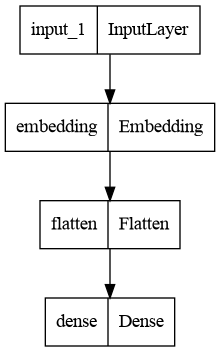

In [23]:
tf.keras.utils.plot_model(model)

In [24]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [25]:
history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    callbacks = [tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=3,
        restore_best_weights=True
    )]
)

Epoch 1/100
397/397 [==============================] - 18s 44ms/step - loss: 0.5614 - accuracy: 0.7056 - val_loss: 0.4727 - val_accuracy: 0.7826
Epoch 2/100
397/397 [==============================] - 13s 34ms/step - loss: 0.3502 - accuracy: 0.8591 - val_loss: 0.4618 - val_accuracy: 0.8006
Epoch 3/100
397/397 [==============================] - 14s 37ms/step - loss: 0.1980 - accuracy: 0.9377 - val_loss: 0.4945 - val_accuracy: 0.7845
Epoch 4/100
397/397 [==============================] - 15s 39ms/step - loss: 0.1008 - accuracy: 0.9787 - val_loss: 0.5390 - val_accuracy: 0.7738
Epoch 5/100
397/397 [==============================] - 14s 34ms/step - loss: 0.0540 - accuracy: 0.9909 - val_loss: 0.5845 - val_accuracy: 0.7710


### Results

In [26]:
model.evaluate(X_test, y_test)

213/213 [==============================] - 1s 4ms/step - loss: 0.4518 - accuracy: 0.8023


[0.4517500400543213, 0.8022964596748352]